In [28]:
import pandas as pd
df = pd.read_csv("../data/tmdb_5000_movies.csv") # reads data from csv.file
df.head() # Shows the first five rows 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [29]:
df.isnull().sum().sort_values(ascending=False) # show the amount of missing values in every column 

homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
budget                     0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
production_countries       0
genres                     0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
vote_count                 0
dtype: int64

In [30]:
#Revenue and profit
df['budget'] = df['budget'].replace(0, pd.NA) # replaces 0 for NA in budget
df['revenue'] = df['revenue'].replace(0, pd.NA) # replaces 0 for NA in revenue

df_clean = df.dropna(subset=['budget', 'revenue']).copy() # removes movies with no budget or no revenue

df_clean['profit'] = df_clean['revenue'] - df_clean['budget'] # create a new column with profit

df_clean['release_year'] = pd.to_datetime(df_clean['release_date'], errors='coerce').dt.year # extracts year from column release_date to illustrate movie name followed by year produced

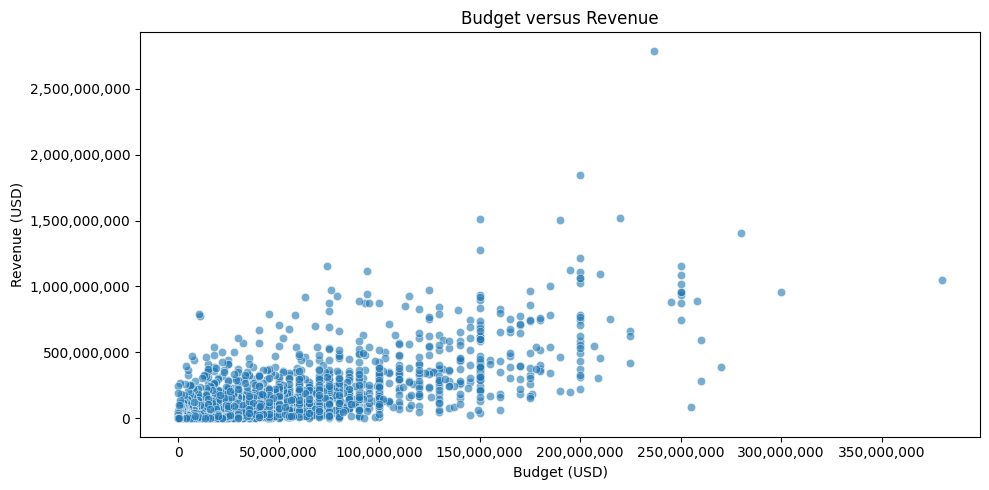

In [31]:
# Visualization (budget versus revenue)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# these lines below prints out a scatterplot between budget and revenue
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x='budget', y='revenue', alpha=0.6)
plt.title('Budget versus Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()

In [32]:
### Identify outliers in the scatterplot
## We will filtrate movies that have a very high budget or revenue by using the 99th percentile as a benchmark

In [33]:
budget_threshold = df_clean['budget'].quantile(0.99) # threshold for what counts as an outlier
revenue_threshold = df_clean['revenue'].quantile(0.99)

outliers = df_clean[
    (df_clean['budget'] >= budget_threshold) |
    (df_clean['revenue'] >= revenue_threshold)
].copy()

outliers['release_year'] = df_clean.loc[outliers.index, 'release_year']

outliers[['title', 'budget', 'revenue', 'profit']].sort_values(by='budget', ascending=False) # show outliers

,title,budget,revenue,profit
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000
7,Avengers: Age of Ultron,280000000,1405403694,1125403694
10,Superman Returns,270000000,391081192,121081192
4,John Carter,260000000,284139100,24139100
...,...,...,...,...
329,The Lord of the Rings: The Return of the King,94000000,1118888979,1024888979
330,The Lord of the Rings: The Two Towers,79000000,926287400,847287400
506,Despicable Me 2,76000000,970761885,894761885
546,Minions,74000000,1156730962,1082730962


In [34]:
### Next step: Visualize budget versus revenue for the chosen titles

TypeError: 'str' object is not a mapping

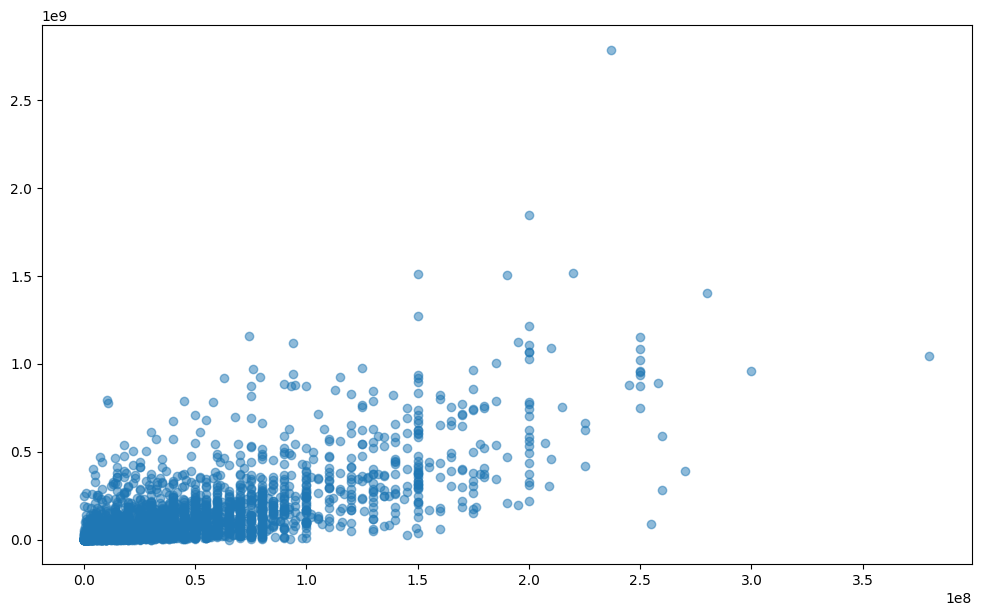

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.scatter(df_clean['budget'], df_clean['revenue'], alpha=0.5) #show all movies

for _, row in outliers.iterrows():
    if pd.notnull(row['release_year']):
        title_with_year = f"{row['title']} ({int(row['release_year'])})"
    else:
        title_with_year = row['title'] 
        
    plt.text(row['budget'], row['revenue'], title_with_year, fontsize=8, ha='right') # add all outliers (movies)

plt.title('Budget versus Revenue for chosen movie titles')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()

In [36]:
### Next step: Add column that marks the outliers

In [ ]:
df_clean['is_outlier'] = df_clean.index.isin(outliers.index)

In [14]:
### Import outliers to separate CSV file, for the purpose of e.g more in depth analysis

In [17]:
outliers.to_csv("outliers_movies.csv", index=False) # export outliers to CSV file in the root folder

In [19]:
df_clean.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit'],
      dtype='object')